**In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.** 
 
A look at the data 
 
Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a player performed in the 2013-2014 NBA season. 
 
Download **'nba_2013.csv'** file from this link: 
 
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0 
 
Here are some selected columns from the data: 
 
`player` - name of the player 
 
`pos` - the position of the player 
 
`g` - number of games the player was in 
 
`gs` - number of games the player started 
 
`pts` - total points the player scored 
 
There are many more columns in the data, mostly containing information about average player game performance over the course of the season. See this site for an explanation of the rest of them.

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [3]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

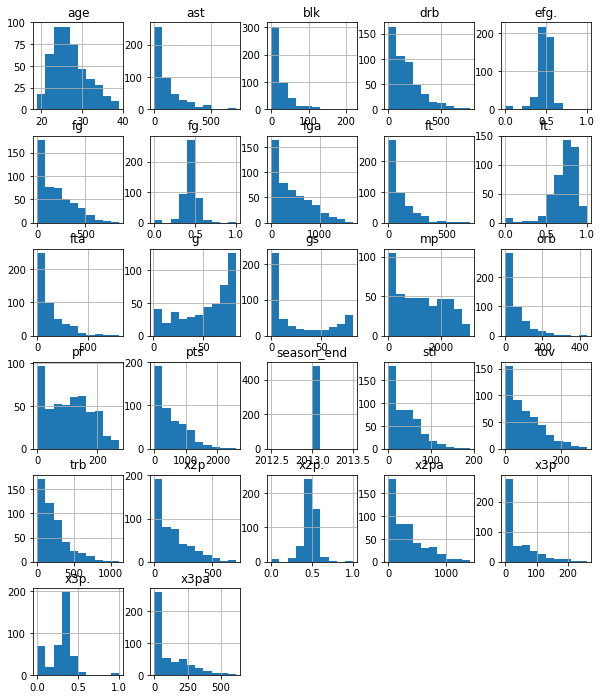

In [6]:
nba.hist(figsize=(10,12))
plt.show()

In [7]:
df =nba.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [8]:
df.drop('player', inplace=True, axis=1)
#df.drop('age', inplace=True, axis=1)
df.drop('bref_team_id', inplace=True, axis=1)
df.drop('season', inplace=True, axis=1)
df.drop('season_end', inplace=True, axis=1)

In [59]:
 df.isnull().sum()

pos      0
age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      2
x3p      0
x3pa     0
x3p.    67
x2p      0
x2pa     0
x2p.     3
efg.     2
ft       0
fta      0
ft.     20
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
pts      0
dtype: int64

Handling NA   ---fg.,x2p., efg.  conatins 2,3 and 2 nan so can drop

In [63]:
df.dropna(subset=['fg.'], inplace=True)
df.dropna(subset=['x2p.'], inplace=True)
df.dropna(subset=['efg.'], inplace=True)

In [68]:
df.isnull().sum()


pos      0
age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      0
x3p      0
x3pa     0
x3p.    65
x2p      0
x2pa     0
x2p.     0
efg.     0
ft       0
fta      0
ft.     18
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
pts      0
dtype: int64

Observation: x3p. and ft. contains significant no. of null values so we would not take those features in model, almost we taking this df as clear

In [75]:
df.drop('x3p.', axis=1, inplace=True)
df.drop('ft.', axis=1, inplace=True)

In [70]:
df['pos'].unique()


array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

In [102]:
df.columns


Index(['pos', 'age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x2p',
       'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [110]:
X=df[df.columns[:-1]] # features
Y=df[df.columns[-1]] #target variable

In [112]:
X.shape, Y.shape

((478, 24), (478,))

### Creating `pos` dummies
this is the only object column now

In [113]:
for c in X.columns:
    if X[c].dtypes == 'object':
        X= pd.get_dummies(X, columns=[c])
        
        

In [114]:
#confirming extra columns 
set(X.columns)-set(df.columns)

{'pos_C', 'pos_F', 'pos_G', 'pos_PF', 'pos_PG', 'pos_SF', 'pos_SG'}

In [115]:
X.columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x2p',
       'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pos_C', 'pos_F', 'pos_G', 'pos_PF', 'pos_PG',
       'pos_SF', 'pos_SG'],
      dtype='object')

In [119]:
#Splitting the training set and test set

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [120]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((382, 30), (96, 30), (382,), (96,))

In [121]:
X_train.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x2p,...,blk,tov,pf,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
208,23,34,34,1143,203,454,0.447,30,77,173,...,12,105,92,0,0,0,0,1,0,0
265,30,69,67,2288,513,981,0.523,0,1,513,...,26,152,206,0,0,0,1,0,0,0
200,23,70,23,1856,344,639,0.538,0,1,344,...,116,114,185,0,0,0,1,0,0,0
278,27,79,79,2862,457,1080,0.423,190,500,267,...,15,194,267,0,0,0,0,1,0,0
379,24,65,13,1089,143,300,0.477,0,0,143,...,47,44,134,1,0,0,0,0,0,0


In [127]:
#scaling values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [129]:
#Applying Algorithm KNN to the training dataset
from sklearn.neighbors import KNeighborsRegressor
classifier = KNeighborsRegressor(n_neighbors=5, metric= "minkowski", p =2)
classifier.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

Text(0.5,1,'Actual Pts vs Predicted Pts')

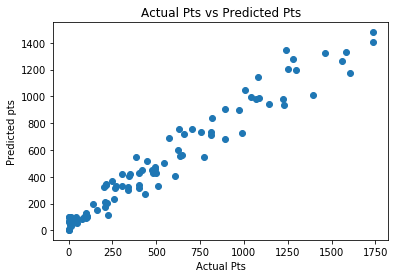

In [134]:
#Predicting the test data
y_pred = classifier.predict(X_test)

#Plotting the scatter plots
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Pts")
plt.ylabel("Predicted pts")
plt.title("Actual Pts vs Predicted Pts")

In [139]:
#error calculation
import math
print(mean_squared_error(y_test, y_pred))

print(math.sqrt(mean_squared_error(y_test, y_pred)))

17424.15625
132.00059185473376


In [146]:
rmse = []
for K in range(20):
    K_value = K+1
    neigh = KNeighborsRegressor(n_neighbors = K_value, metric= "minkowski", p =2)
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    rmse.append(math.sqrt(mean_squared_error(y_test, y_pred)))
    print('RMSE value for k= ' , K , 'is:', math.sqrt(mean_squared_error(y_test, y_pred)))

RMSE value for k=  0 is: 132.00059185473376
RMSE value for k=  1 is: 118.7457565031273
RMSE value for k=  2 is: 127.32134814886481
RMSE value for k=  3 is: 122.57805761364199
RMSE value for k=  4 is: 123.9219277071926
RMSE value for k=  5 is: 118.76593338525308
RMSE value for k=  6 is: 121.04430269238497
RMSE value for k=  7 is: 118.84720870482018
RMSE value for k=  8 is: 123.1579996407639
RMSE value for k=  9 is: 126.04244242185514
RMSE value for k=  10 is: 127.11424927657012
RMSE value for k=  11 is: 126.08196755842121
RMSE value for k=  12 is: 127.32289130938187
RMSE value for k=  13 is: 127.23606029892296
RMSE value for k=  14 is: 130.30367824744937
RMSE value for k=  15 is: 133.32102400862487
RMSE value for k=  16 is: 136.76544868552233
RMSE value for k=  17 is: 136.8939686576271
RMSE value for k=  18 is: 139.01715004106566
RMSE value for k=  19 is: 141.8492765777288


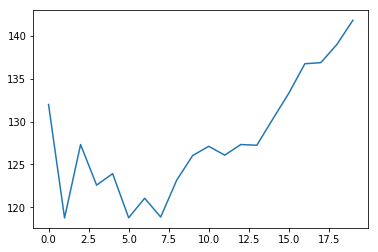

In [148]:
# ploting rmse
plt.plot(range(20), rmse)


Observation: K=5 is ok

In [152]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor(metric= "minkowski", p =2)

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 4}